# Notebook: SQL in Python

**References / Sources: Data-X Plaksha**

[SQL Syntax Convention](https://dataschool.com/how-to-teach-people-sql/syntax-conventions/#:~:text=For%20readability%2C%20all%20SQL%20commands,what%20the%20query%20is%20executing.)

[Quick References](https://www.w3schools.com/sql/sql_quickref.asp)

# Table of Contents

### * [Basics: sqlite3 (Python builtin)](#sec1)
### * [Pandas and SQL](#sec2)
### * [ORM: SQLAlchemy](#sec3)

# SQLite 3

In [1]:
# sqlite3 package comes with the Python installation
import sqlite3

In [2]:
# list files in w.d.
!ls

311_NYC.csv  README.md	company.db  python_sql.ipynb


In [3]:
# open connnection to a db file stored locally on disk
# if file doesn't exist it is created
connection = sqlite3.connect('company.db')

In [4]:
!ls # file is created

311_NYC.csv  README.md	company.db  python_sql.ipynb


In [5]:
# In order to run SQL commands with
# sqlite 3 we must create a cursor object
# that traverses the database
cursor = connection.cursor()

# to run sql commands execute them

In [6]:
# Check that we are working with an empty db
cursor.execute("DROP TABLE IF EXISTS employee;")

In [7]:
# We can define long SQL commands within three quotes

sql_command = """
CREATE TABLE employee (
staff_number INTEGER PRIMARY KEY,
fname VARCHAR(20),
lname VARCHAR(30),
gender CHAR(1),
birth_date DATE);
"""

# VARCHAR string that can be up to X characters
# CHAR has to be X characters

**Link to SQL datatypes:** [https://www.w3schools.com/sql/sql_datatypes.asp](https://www.w3schools.com/sql/sql_datatypes.asp)

In [8]:
# In order to run SQL command on the databse file
# we have to execute them with the cursor
cursor.execute(sql_command)

In [9]:
sql_command = '''
INSERT INTO employee
(staff_number, fname, lname, gender, birth_date)
VALUES
(NULL, NULL, "Shakespeare", "m", "1961-10-25");'''

cursor.execute(sql_command)

In [10]:
sql_command = '''
INSERT INTO employee
(staff_number, fname, lname, gender, birth_date)
VALUES (5, "Frankia2", "Schillerya2", "m", "1958-08-17");'''


cursor.execute(sql_command)

In [11]:
# never forget to commit your queries
# if you have updated the database
# and close the connection when you're done

connection.commit()

connection.close()

In [12]:
# reopen the connection and create cursor
connection = sqlite3.connect('company.db')

cursor = connection.cursor()

In [13]:
a = cursor.execute('SELECT * FROM employee;')

In [14]:
a

In [15]:
a.fetchall()

[(1, None, 'Shakespeare', 'm', '1961-10-25'),
 (5, 'Frankia2', 'Schillerya2', 'm', '1958-08-17')]

In [16]:
# fetch values, a.fetchall is a generator object
for row in a.fetchall():
    print(row)

In [17]:
# close connection
connection.close()

In [18]:
# Assume we already have a company.db sqlite database file
# with a Table called employees

# Add several values with sqlite3 and string formatting

connection = sqlite3.connect("company.db")

cursor = connection.cursor()

# list of tuples we want to add to the database
staff_data = [ ("Alfred", "Nobel", "m", "1921-05-02"), \
              ("Klaus", "Kinski", "m", "1935-09-07"),  \
              ("Jane", "Wall", "f", "1989-05-03") ]

for p in staff_data:

    # define string to be formatted, name format placeholders within curly brackets
    format_str = '''
    INSERT INTO employee (staff_number, fname, lname, gender, birth_date)
    VALUES (NULL, "{first}", "{last}", "{gender}", "{birthdate}");
    '''

    # define SQL command
    sql_command = format_str.format(first=p[0], last=p[1],
                                gender=p[2], birthdate = p[3])

    cursor.execute(sql_command)

# Commit changes
connection.commit()

In [19]:
# Check that the changes were committed
cursor.execute("SELECT * FROM employee")

print("fetchall:")

result = cursor.fetchall()

for r in result:

    print(r)

fetchall:
(1, None, 'Shakespeare', 'm', '1961-10-25')
(5, 'Frankia2', 'Schillerya2', 'm', '1958-08-17')
(6, 'Alfred', 'Nobel', 'm', '1921-05-02')
(7, 'Klaus', 'Kinski', 'm', '1935-09-07')
(8, 'Jane', 'Wall', 'f', '1989-05-03')


In [20]:
cursor.execute('SELECT Count(*) FROM employee').fetchone()[0]

5

In [21]:
# Alternative approach

# Count rows in the database
n_rows = cursor.execute('SELECT Count(*) FROM employee').fetchone()[0]

res = cursor.execute("SELECT * FROM employee")

print("\nFetch one at a time:")
for i in range(0, n_rows): # we need to unpack
    tmp = res.fetchone()

    print(tmp)


Fetch one at a time:
(1, None, 'Shakespeare', 'm', '1961-10-25')
(5, 'Frankia2', 'Schillerya2', 'm', '1958-08-17')
(6, 'Alfred', 'Nobel', 'm', '1921-05-02')
(7, 'Klaus', 'Kinski', 'm', '1935-09-07')
(8, 'Jane', 'Wall', 'f', '1989-05-03')


In [22]:
# Filter values using WHERE

sql_command = '''
SELECT *
FROM employee
WHERE gender = 'f';
'''

cursor.execute(sql_command).fetchall()

[(8, 'Jane', 'Wall', 'f', '1989-05-03')]

In [23]:
# Value matching/string completion using LIKE

sql_command = '''
SELECT *
FROM employee
WHERE birth_date LIKE "%196%";
'''

cursor.execute(sql_command).fetchall()

[(1, None, 'Shakespeare', 'm', '1961-10-25')]

In [24]:
# Filtering based on a range of values

sql_command = '''
SELECT staff_number, gender, birth_date
FROM employee
WHERE birth_date > '1950-01-01'
AND gender = 'm' ;
'''

cursor.execute(sql_command).fetchall()

[(1, 'm', '1961-10-25'), (5, 'm', '1958-08-17')]

In [25]:
# UPDATE values in the database

sql_command = '''
UPDATE employee
SET fname = "William"
WHERE lname = "Shakespeare";
'''

cursor.execute(sql_command)
cursor.execute('SELECT * FROM employee').fetchall()

[(1, 'William', 'Shakespeare', 'm', '1961-10-25'),
 (5, 'Frankia2', 'Schillerya2', 'm', '1958-08-17'),
 (6, 'Alfred', 'Nobel', 'm', '1921-05-02'),
 (7, 'Klaus', 'Kinski', 'm', '1935-09-07'),
 (8, 'Jane', 'Wall', 'f', '1989-05-03')]

In [26]:
# Removing values from the database

sql_command = '''
DELETE FROM employee
WHERE fname = "William";
'''

cursor.execute(sql_command)
cursor.execute('SELECT * FROM employee').fetchall()

# '''DROP employees''' will delete all data and the table structure as well.
# '''DELETE * FROM employee''' will delete the data but the table structure will remain the same.

[(5, 'Frankia2', 'Schillerya2', 'm', '1958-08-17'),
 (6, 'Alfred', 'Nobel', 'm', '1921-05-02'),
 (7, 'Klaus', 'Kinski', 'm', '1935-09-07'),
 (8, 'Jane', 'Wall', 'f', '1989-05-03')]

In [27]:
connection.commit()
connection.close()

## JOINS

In [28]:
connection = sqlite3.connect('orders.db')

cursor = connection.cursor()

In [29]:
sql_command = '''
CREATE TABLE Customers(
CustomerID INT NOT NULL,
CustomerName VARCHAR(100) NOT NULL,
Country VARCHAR(70) NOT NULL,
PRIMARY KEY (CustomerID));
'''

cursor.execute(sql_command)

sql_command = '''
INSERT INTO Customers (CustomerId, CustomerName, Country)
VALUES (1, "John Doe", "USA") UNION
VALUES (2, "Jane King", "Germany") UNION
VALUES (3, "Aby Will", "Canada") UNION
VALUES (4, "Bob Chen", "China");
'''

cursor.execute(sql_command)
cursor.execute('SELECT * FROM Customers').fetchall()

[(1, 'John Doe', 'USA'),
 (2, 'Jane King', 'Germany'),
 (3, 'Aby Will', 'Canada'),
 (4, 'Bob Chen', 'China')]

In [30]:
sql_command = '''
CREATE TABLE Orders
(OrderID INT NOT NULL,
CustomerID INT NOT NULL,
OrderDate DATE NOT NULL,
PRIMARY KEY (OrderID),
FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID));
'''

cursor.execute(sql_command)

sql_command = '''
INSERT INTO Orders (OrderId, CustomerId, OrderDate)
VALUES (1, 1, '2016-09-01') UNION
VALUES (2, 4, '2016-07-25') UNION
VALUES (3, 1, '2016-08-06');
'''

cursor.execute(sql_command)
cursor.execute('SELECT * FROM Orders').fetchall()

[(1, 1, '2016-09-01'), (2, 4, '2016-07-25'), (3, 1, '2016-08-06')]

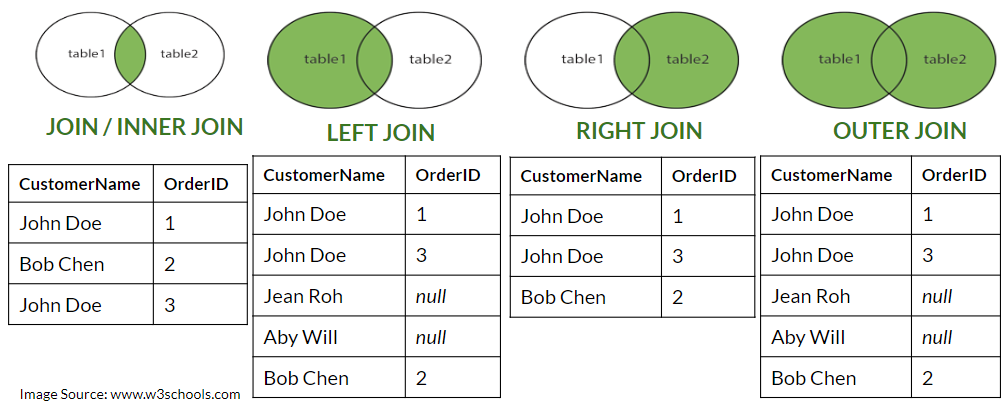

In [31]:
sql_command = '''
SELECT Customers.CustomerName, Orders.OrderID
FROM Customers JOIN Orders
ON Customers.CustomerID = Orders.CustomerID;
'''

cursor.execute(sql_command).fetchall()

[('John Doe', 1), ('Bob Chen', 2), ('John Doe', 3)]

# Quick Data Analysis with SQL and Pandas

### Preferred method when running SELECT statements

In [32]:
import pandas as pd
import datetime as dt

In [33]:
# this gives the output as a dataframe
connection = sqlite3.connect("company.db")

pd.read_sql_query('SELECT * FROM employee', con = connection)

,staff_number,fname,lname,gender,birth_date
0,5,Frankia2,Schillerya2,m,1958-08-17
1,6,Alfred,Nobel,m,1921-05-02
2,7,Klaus,Kinski,m,1935-09-07
3,8,Jane,Wall,f,1989-05-03


#### Initialize database with filename 311_NYC.db in current working directory

In [34]:
!head -n10 311_NYC.csv

index,CreatedDate,ClosedDate,Agency,ComplaintType,Descriptor,City
1,"2011-06-20 10:53:34","2011-06-20 15:15:10",DOF,"DOF Property - Owner Issue","Remove Mortgage","GLEN OAKS"
2,"2011-06-20 10:43:46","2011-06-30 11:33:32",DOT,"Street Condition","Defective Hardware",BROOKLYN
3,"2011-06-20 11:14:08","2011-06-21 18:41:35",DHS,"DHS Advantage - Tenant","Other Issue","SOUTH RICHMOND HILL"
4,"2011-06-20 11:19:17","2011-06-20 14:11:47",DOT,"Broken Muni Meter","No Receipt","FOREST HILLS"
5,"2011-06-20 11:41:47","2011-06-27 10:22:55",DOF,SCRIE,"SCRIE Recertification","NEW YORK"
6,"2011-06-20 11:39:36","2011-06-24 09:07:31",DOF,SCRIE,"SCRIE Application Problem",BROOKLYN
7,"2011-06-20 12:47:17","2011-06-21 09:59:33",DOF,"DOF Property - Reduction Issue","Condo or Co-op Abatement",BROOKLYN
8,"2011-06-20 13:08:49","2011-06-22 13:43:12",DOF,"DOF Property - Payment Issue","Misapplied Payment","QUEENS VILLAGE"
9,"2011-06-20 00:00:00","2011-07-18 00:00:00",DOHMH,Rodent,"Rat Sighting","NEW YORK"


In [35]:
!wc -l 311_NYC.csv #number of lines

40001 311_NYC.csv


### Read in big CSV file to Database

Original data set can be downloaded here (several GB's): https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

In [36]:
connection = sqlite3.connect('311_NYC.db')

In [37]:
start = dt.datetime.now()
chunksize = 20000
j = 0
index_start = 1

for df in pd.read_csv('311_NYC.csv', chunksize=chunksize, iterator=True, encoding='utf-8'):

    df = df.rename(columns={c: c.replace(' ', '') for c in df.columns}) # Remove spaces from columns

    df['CreatedDate'] = pd.to_datetime(df['CreatedDate']) # Convert to datetimes
    df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])

    df.index += index_start

    # Columns to keep
    columns = ['Agency', 'CreatedDate', 'ClosedDate', 'ComplaintType', 'Descriptor',
               'TimeToCompletion','City']

    for c in df.columns:
        if c not in columns:
            df = df.drop(c, axis=1)

    j+=1

    df.to_sql('data', con=connection, if_exists='append') # name of SQL table, connection, append

    print('{} seconds: completed {} rows'.format((dt.datetime.now() - start).seconds, j*chunksize))

    index_start = df.index[-1] + 1 # update index start

0 seconds: completed 20000 rows
0 seconds: completed 40000 rows


#### Preview the DataBase

In [38]:
pd.read_sql_query('SELECT * FROM data', connection).head()

,index,CreatedDate,ClosedDate,Agency,ComplaintType,Descriptor,City
0,1,2011-06-20 10:53:34,2011-06-20 15:15:10,DOF,DOF Property - Owner Issue,Remove Mortgage,GLEN OAKS
1,2,2011-06-20 10:43:46,2011-06-30 11:33:32,DOT,Street Condition,Defective Hardware,BROOKLYN
2,3,2011-06-20 11:14:08,2011-06-21 18:41:35,DHS,DHS Advantage - Tenant,Other Issue,SOUTH RICHMOND HILL
3,4,2011-06-20 11:19:17,2011-06-20 14:11:47,DOT,Broken Muni Meter,No Receipt,FOREST HILLS
4,5,2011-06-20 11:41:47,2011-06-27 10:22:55,DOF,SCRIE,SCRIE Recertification,NEW YORK


#### Select a few columns

In [39]:
pd.read_sql_query('SELECT Agency, Descriptor FROM data LIMIT 3', connection)

,Agency,Descriptor
0,DOF,Remove Mortgage
1,DOT,Defective Hardware
2,DHS,Other Issue


#### Filter rows using WHERE

In [40]:
# we can also save the output as a DataFrame
df = pd.read_sql_query('SELECT ComplaintType, Descriptor, Agency '
                       'FROM data '
                       'WHERE Agency = "DOT" '
                       'LIMIT 10', connection)
df

,ComplaintType,Descriptor,Agency
0,Street Condition,Defective Hardware,DOT
1,Broken Muni Meter,No Receipt,DOT
2,Street Condition,Cave-in,DOT
3,Sidewalk Condition,Blocked - Construction,DOT
4,Broken Parking Meter,Coin or Card Did Not Register,DOT
5,Street Light Condition,Street Light Out,DOT
6,Street Condition,"Rough, Pitted or Cracked Roads",DOT
7,Sidewalk Condition,Dumpster - Construction Waste,DOT
8,Street Condition,Blocked - Construction,DOT
9,Street Condition,Cave-in,DOT


#### Filter multiple values in a column using IN

In [41]:
df = pd.read_sql_query('SELECT ComplaintType, Descriptor, Agency '
                       'FROM data '
                       'WHERE Agency IN ("NYPD", "DOB")'
                       'LIMIT 20', connection)
df.head()

,ComplaintType,Descriptor,Agency
0,Noise - Street/Sidewalk,Loud Music/Party,NYPD
1,Blocked Driveway,No Access,NYPD
2,Blocked Driveway,No Access,NYPD
3,Blocked Driveway,Partial Access,NYPD
4,Noise - Residential,Loud Music/Party,NYPD


#### Find Unique values using DISTINCT

In [42]:
df = pd.read_sql_query('SELECT DISTINCT Agency FROM data', connection)
df

,Agency
0,DOF
1,DOT
2,DHS
3,DOHMH
4,NYPD
5,DPR
6,EDC
7,TLC
8,DOB
9,DCA


####  Query values using Count(*) and GROUP BY and ORDER BY

#### Which agency receives the most complaints?

In [43]:
sql_command = '''
SELECT Agency, Count(*)
AS num_complaints
FROM data
GROUP BY Agency
ORDER BY num_complaints DESC'''

pd.read_sql_query(sql_command, connection)

,Agency,num_complaints
0,HPD,12676
1,DOT,6354
2,NYPD,5178
3,DEP,3380
4,DSNY,2334
5,DPR,2276
6,DOF,2238
7,DOB,2102
8,DOHMH,1278
9,DHS,762


#### What is the most common complaint type?

In [44]:
df = pd.read_sql_query('SELECT ComplaintType, Count(*) AS num_complaints '
                       'FROM data '
                       'GROUP BY ComplaintType '
                       'ORDER BY num_complaints DESC', connection)

df.head()

,ComplaintType,num_complaints
0,GENERAL CONSTRUCTION,3400
1,Street Light Condition,2692
2,PLUMBING,2524
3,PAINT - PLASTER,2378
4,NONCONST,2240


#### Number of complaints per city for the top 20 cities with most complaints

In [45]:
sql_command = '''
SELECT City, Count(*) AS num_complaints
FROM Data
GROUP BY City
ORDER BY num_complaints DESC
LIMIT 20
'''

df = pd.read_sql_query(sql_command, connection)
df

,City,num_complaints
0,BROOKLYN,13070
1,BRONX,7172
2,NEW YORK,6436
3,STATEN ISLAND,2226
4,None,2172
5,JAMAICA,1148
6,FLUSHING,750
7,ASTORIA,592
8,RIDGEWOOD,470
9,CORONA,340


#### Perform Case Insensitive Queries

In [46]:
sql_command = '''
SELECT City, Count(*) AS num_complaints
FROM Data
GROUP BY City COLLATE NOCASE
ORDER BY num_complaints DESC
LIMIT 20
'''

df = pd.read_sql_query(sql_command, connection)
df # Jamaica, Flushing etc have more complaints now

,City,num_complaints
0,BROOKLYN,13070
1,BRONX,7172
2,NEW YORK,6436
3,STATEN ISLAND,2226
4,None,2172
5,JAMAICA,1156
6,FLUSHING,764
7,ASTORIA,600
8,RIDGEWOOD,474
9,CORONA,344


# ORM: Object Relational Mapper

[Documentation](https://docs.sqlalchemy.org/en/13/index.html)

## Use SQLAlchemy to define tables as classes
### Make use of ORM (Object Relational Mapper)
Great for large scale systems

In [50]:
!pip install sqlalchemy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 2.2 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.9/612.9 KB 5.8 MB/s eta 0:00:00a 0:00:01


In [51]:
import os
import sys
from sqlalchemy import Column, ForeignKey, Integer, String
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import relationship
from sqlalchemy import create_engine

Base = declarative_base()

class Person(Base):
    __tablename__ = 'person'
    # Here we define columns for the table person
    # Notice that each column is also a normal Python instance attribute.
    id = Column(Integer, primary_key=True)
    name = Column(String(250), nullable=False)

class Address(Base):
    __tablename__ = 'address'
    # Here we define columns for the table address.
    # Notice that each column is also a normal Python instance attribute.
    id = Column(Integer, primary_key=True)
    street_name = Column(String(250))
    street_number = Column(String(250))
    post_code = Column(String(250), nullable=False)
    person_id = Column(Integer, ForeignKey('person.id'))
    person = relationship(Person)


# Create an engine that stores data in the local directory's
# sqlalchemy_example.db file.
engine = create_engine('sqlite:///sqlalchemy_example.db')

# Create all tables in the engine. This is equivalent to "Create Table"
# statements in raw SQL.
Base.metadata.create_all(engine)

/tmp/ipykernel_31963/403329293.py:8: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


In [52]:
from sqlalchemy.orm import sessionmaker

# Bind the engine to the metadata of the Base class so that the
# declaratives can be accessed through a DBSession instance
Base.metadata.bind = engine

DBSession = sessionmaker(bind=engine)
# A DBSession() instance establishes all conversations with the database
# and represents a "staging zone" for all the objects loaded into the
# database session object. Any change made against the objects in the
# session won't be persisted into the database until you call
# session.commit(). If you're not happy about the changes, you can
# revert all of them back to the last commit by calling
# session.rollback()
session = DBSession()

# Insert a Person in the person table
new_person = Person(name='new person')
session.add(new_person)
session.commit()

# Insert an Address in the address table
new_address = Address(post_code='00000', person=new_person,
                     street_name='28th st.')
session.add(new_address)
session.commit()

In [53]:
# Make a query to find all Persons in the database
address = session.query(Address).all()
for a in address:
    print(a.street_name)

# Return the first Person from all Persons in the database
person = session.query(Person).first()
print(person.name)

# Find all Address whose person field is pointing to the person object
session.query(Address).filter(Address.person == person).all()

# Retrieve one Address whose person field is point to the person object
session.query(Address).filter(Address.person == person).one()

address = session.query(Address).filter(Address.person == person).one()
address.post_code

28th st.
new person


'00000'